## Libraries

In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

import seaborn as sns
from scipy import stats

# Import necessary libraries for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read the combined data for analysis
file_path = 'combined_forecasts_2005-2023.csv'
combined_data = pd.read_csv(file_path, parse_dates=['valid_time', 'time'])

# Display basic information and the first few rows of the dataset
combined_data

,valid_time,time,step,t2m
0,2005-01-01 06:00:00,2005-01-01,0 days 06:00:00,3.090616
1,2005-01-01 12:00:00,2005-01-01,0 days 12:00:00,4.884995
2,2005-01-01 18:00:00,2005-01-01,0 days 18:00:00,5.163322
3,2005-01-02 00:00:00,2005-01-01,1 days 00:00:00,5.461974
4,2005-01-02 06:00:00,2005-01-01,1 days 06:00:00,3.571397
...,...,...,...,...
27732,2023-12-30 18:00:00,2023-07-01,182 days 18:00:00,2.248648
27733,2023-12-31 00:00:00,2023-07-01,183 days 00:00:00,1.883473
27734,2023-12-31 06:00:00,2023-07-01,183 days 06:00:00,1.676430
27735,2023-12-31 12:00:00,2023-07-01,183 days 12:00:00,2.671340


## Data Understanding 
We have a DataFrame with 27,737 rows and 4 columns:

- `valid_time`: This is the time at which the prediction is valid. It is a datetime value.
- `time`: This is the time at which the prediction was made. It is also a datetime value.
- `step`: This indicates the "step length," i.e., the time between the time and valid_time. It is stored as a text value.
- `t2m`: This represents the temperature in Celsius. It is a floating numerical value.

None of the columns have missing values

## Time Series of Temperatures

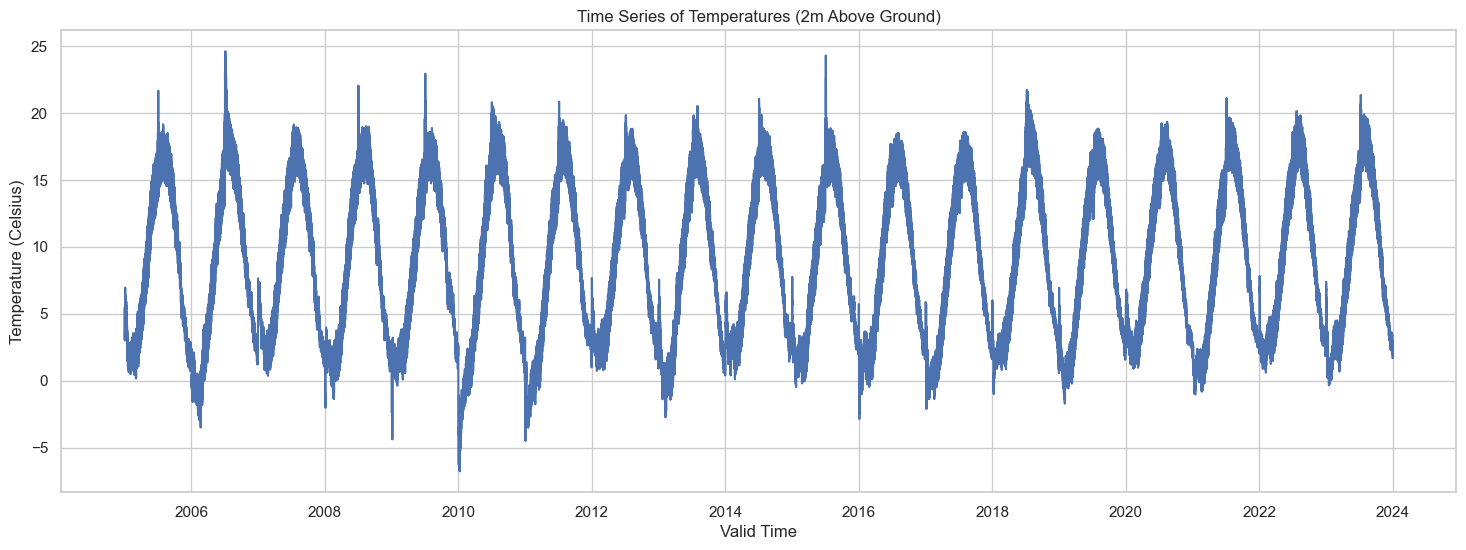

In [8]:
# Set up the styling for plots
sns.set(style="whitegrid")

# Plotting the time series of temperatures
plt.figure(figsize=(18, 6))
sns.lineplot(x="valid_time", y="t2m", data=combined_data)
plt.title("Time Series of Temperatures (2m Above Ground)")
plt.xlabel("Valid Time")
plt.ylabel("Temperature (Celsius)")
plt.show()


The plot above shows the time series of temperatures recorded at 2 meters above ground level from 2005 to 2023. Given the vast time range, the plot provides a high-level view of the temperature fluctuations. It's hard to discern any specific patterns at this scale, but we can still observe some seasonal cycles.

## Time Series Decomposition

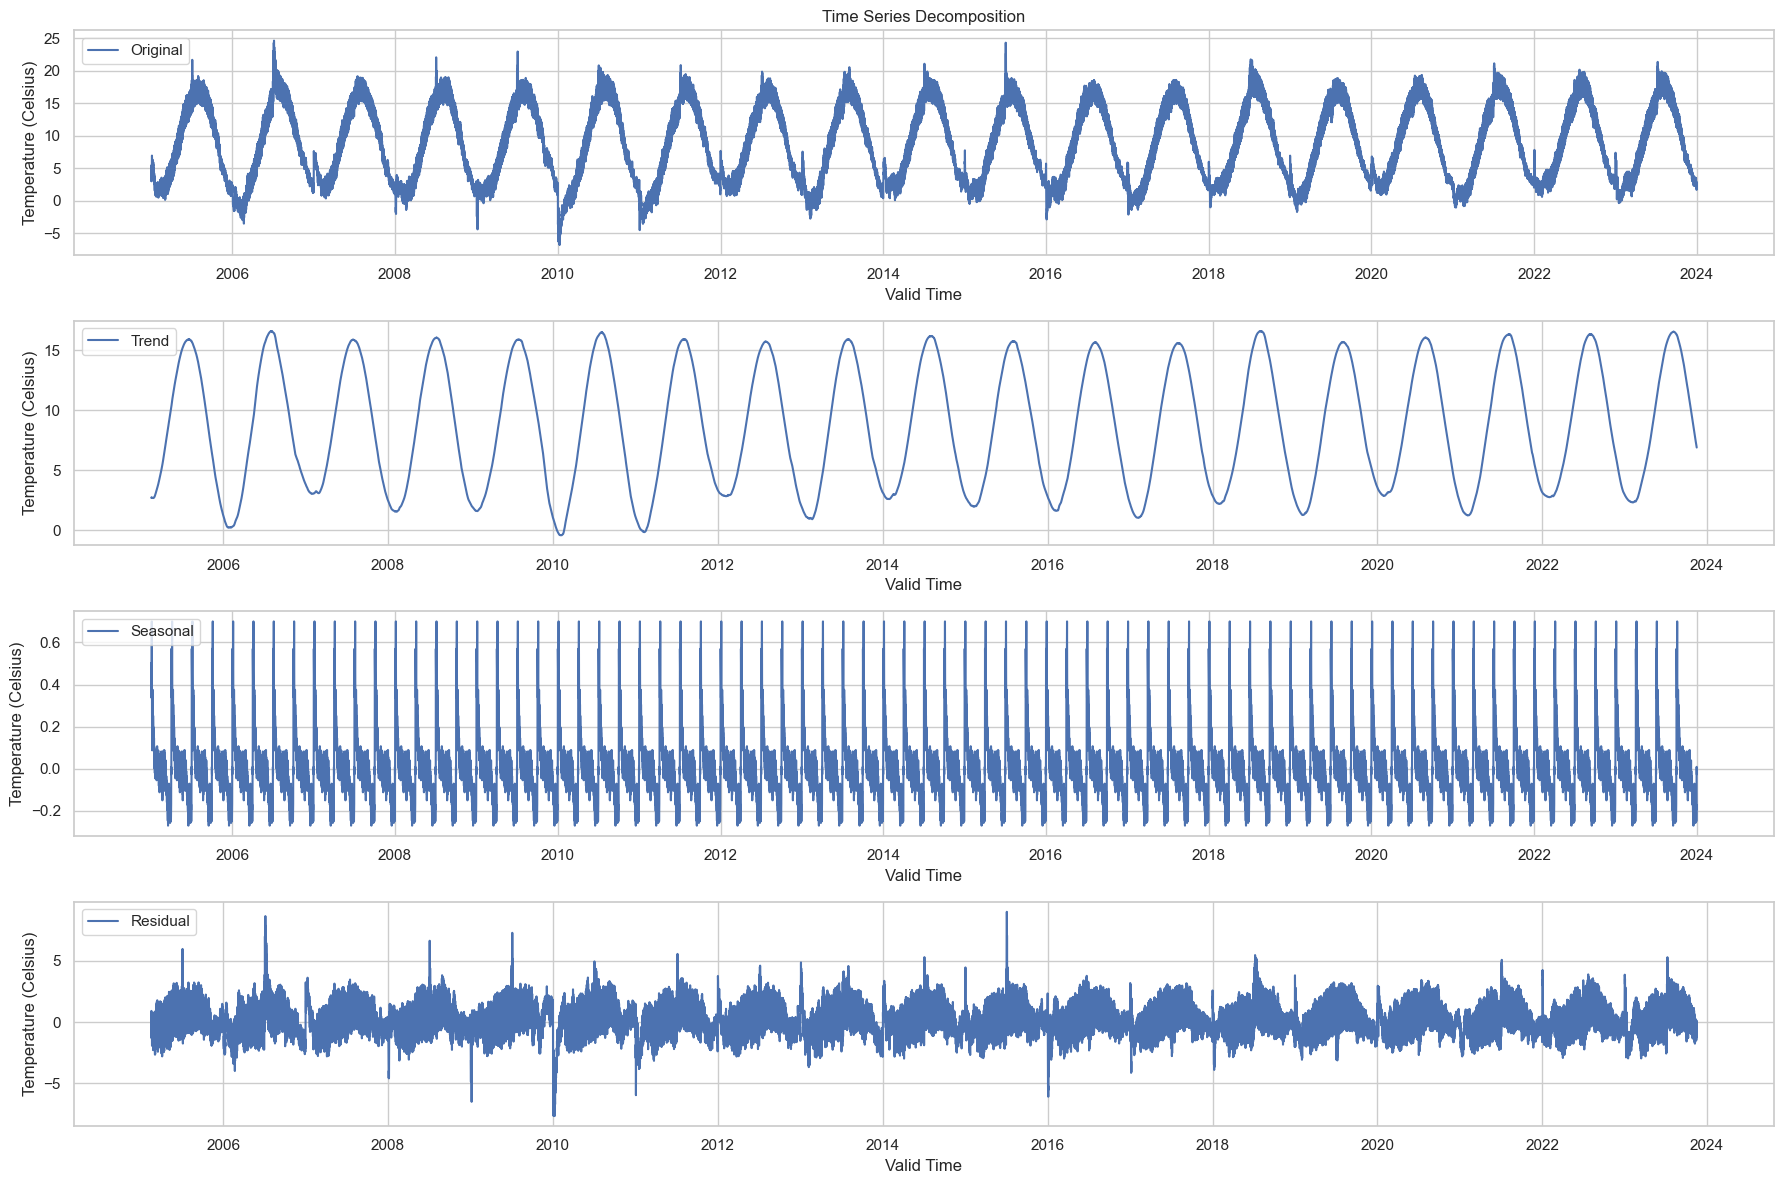

In [11]:

# Convert the DataFrame to a time series with 'valid_time' as the index
time_series_data = combined_data.set_index('valid_time')['t2m']

# Perform seasonal decomposition using the 'period' argument for yearly seasonality
decomposition = seasonal_decompose(time_series_data, period=365)

# Plot the original data, the trend, the seasonality, and the residuals 
plt.figure(figsize=(18, 12))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Original')
plt.legend(loc='upper left')
plt.xlabel('Valid Time')
plt.ylabel('Temperature (Celsius)')
plt.title('Time Series Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.xlabel('Valid Time')
plt.ylabel('Temperature (Celsius)')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.xlabel('Valid Time')
plt.ylabel('Temperature (Celsius)')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.xlabel('Valid Time')
plt.ylabel('Temperature (Celsius)')

plt.tight_layout()
plt.show()


The time series has been decomposed into the following components:

1. **Original**: The original data series is shown at the top for reference.

2. **Trend**: This captures the long-term movement in the data. We can see a slight upward trend over the years, which may be indicative of a general warming over the time period under consideration.

3. **Seasonal**: This captures the repeating short-term cycle in the data. The strong seasonal pattern is evident, and this is likely the annual cycle of temperatures getting warmer in the summer and cooler in the winter.

4. **Residual**: This is what's left after the trend and seasonal components have been removed from the original data. It's essentially the noise or random fluctuations in the data.

This decomposition allows us to better understand the underlying patterns in the data, which could be beneficial when building forecasting models.

1. **Seasonal Component**: Given that we're interested in energy consumption forecasting, understanding the seasonal component is crucial. Energy demand often shows strong seasonality, and it can be informative to understand how temperature (a predictor variable) also shows seasonality.

2. **Trend Over Time**: The trend component could provide insights into long-term changes in temperature, which may be related to broader climate trends. This could be important for long-term planning in energy consumption.

### Deeper Dive into the Seasonal Component and Trend Over Time

To better understand the seasonal component, we can plot just one year's worth of seasonal data to observe the typical seasonal fluctuations.

We can zoom into the trend to see if there are any subtle changes or patterns that are not visible in the overall plot. For instance, are there any specific years where the trend changes more dramatically?

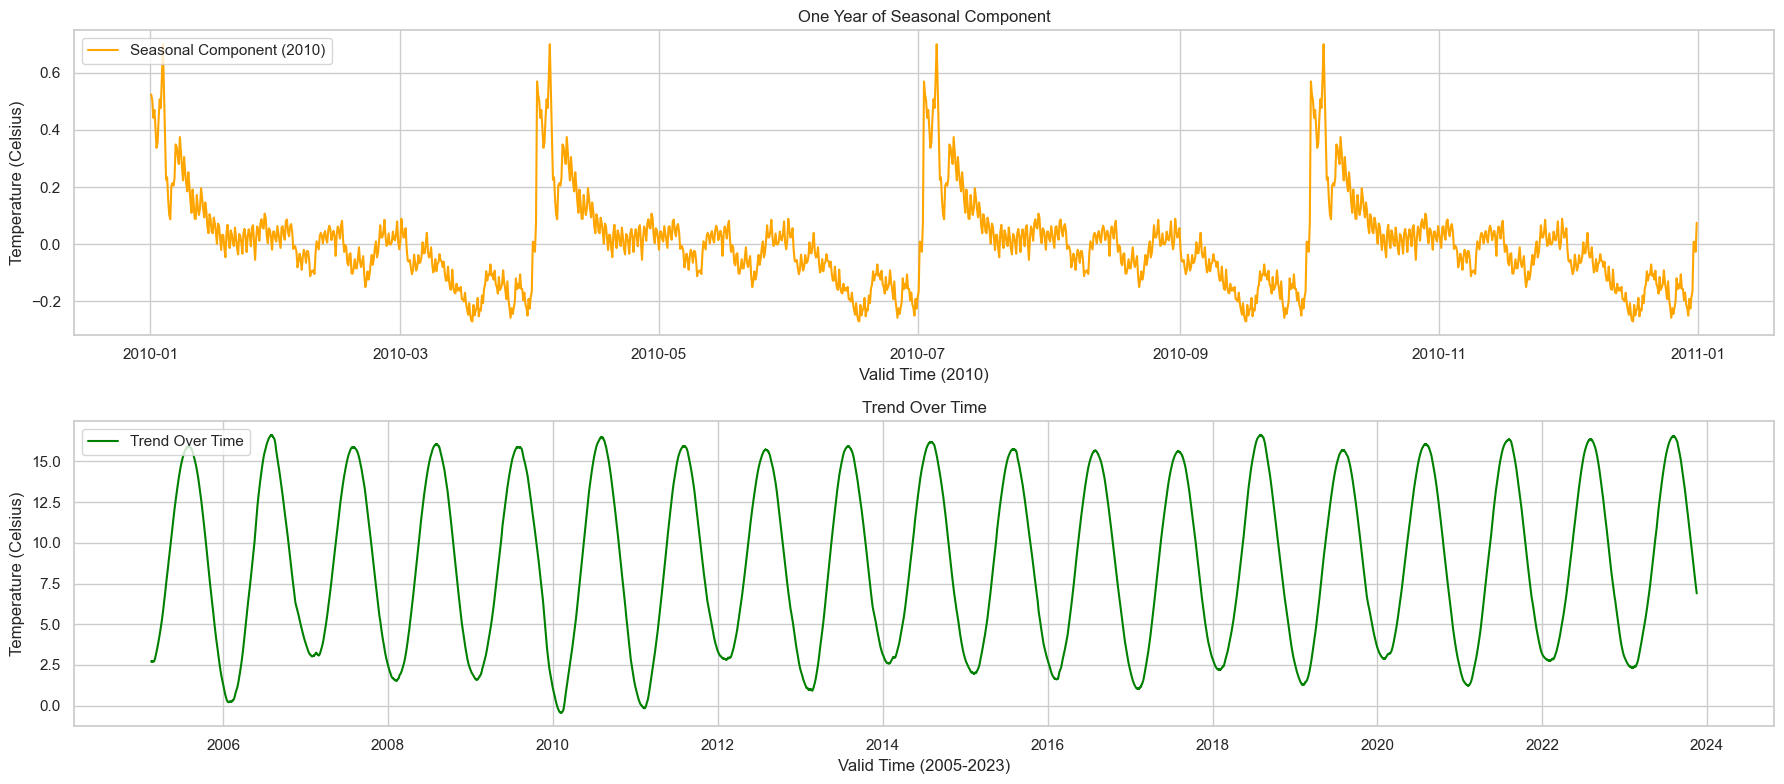

In [14]:
# Deeper Dive into the Seasonal Component
# Extract one year's worth of seasonal data for better visualization
one_year_seasonal = decomposition.seasonal['2010-01-01':'2010-12-31']

# Deeper Dive into the Trend Over Time
# Extract the trend data
trend_data = decomposition.trend.dropna()  # Remove NaN values

# Plotting
plt.figure(figsize=(18, 8))

# Seasonal Component for One Year
plt.subplot(2, 1, 1)
plt.plot(one_year_seasonal, label='Seasonal Component (2010)', color='orange')
plt.legend(loc='upper left')
plt.xlabel('Valid Time (2010)')
plt.ylabel('Temperature (Celsius)')
plt.title('One Year of Seasonal Component')

# Trend Over Time
plt.subplot(2, 1, 2)
plt.plot(trend_data, label='Trend Over Time', color='green')
plt.legend(loc='upper left')
plt.xlabel('Valid Time (2005-2023)')
plt.ylabel('Temperature (Celsius)')
plt.title('Trend Over Time')

plt.tight_layout()
plt.show()


**1. One Year of Seasonal Component (2010)**

The seasonal component for just one year (2010) clearly shows the expected seasonal pattern. Temperatures rise during the summer months and fall during the winter. This strong annual cycle is likely to correlate with seasonal variations in energy demand. For instance, higher temperatures in the summer might correlate with increased air conditioning use, while lower temperatures in the winter might correlate with increased heating.

**2. Trend Over Time (2005-2023)**

The trend over time also reveals some interesting insights. While it's mostly subtle, it does appear that there's a gradual upward trend in temperatures over the years. This could be significant for long-term energy planning, especially considering the broader context of climate change.

Both these deeper dives can offer valuable insights when it comes to predicting energy consumption. Understanding the seasonality can help in short-term forecasting, while understanding the trend is useful for long-term planning.

# Analysis of the error between the forecasts and weather observations

In [25]:
# Load the actual weather observations data again, just to make sure we have it
actual_data_path = 'C:/Users/madsh/OneDrive/Dokumenter/kandidat/Fællesmappe/Speciale/Data/Forbrug og Vejr Data.csv'
actual_data = pd.read_csv(actual_data_path, parse_dates=['HourDK'])

# Rename the 'HourDK' column to 'valid_time' for consistency
actual_data.rename(columns={'HourDK': 'valid_time'}, inplace=True)

# Convert 'valid_time' to datetime format and set it as the index
actual_data['valid_time'] = pd.to_datetime(actual_data['valid_time'])
actual_data.set_index('valid_time', inplace=True)

# Resample the actual data to 6-hour intervals to match the forecast data
# We'll take the mean temperature over each 6-hour period
actual_data_6h = actual_data.resample('6H').mean()

# Load the combined forecast data
forecast_data_path = 'combined_forecasts_2005-2023.csv'
forecast_data = pd.read_csv(forecast_data_path, parse_dates=['valid_time'])

# Set 'valid_time' as the index for the forecast data
forecast_data.set_index('valid_time', inplace=True)

# Merge the forecast and actual observation data based on the 'valid_time' index
merged_data = pd.merge(left=forecast_data[['t2m', 'step']], 
                       right=actual_data_6h[['temp_mean_past1h']], 
                       left_index=True, right_index=True, how='inner')

# Calculate the errors for the three temperature variables
merged_data['error_mean'] = merged_data['t2m'] - merged_data['temp_mean_past1h']


# Group the data by the 'step' variable and calculate the mean absolute error for each group
grouped_by_step = merged_data.groupby('step').agg({
    'error_mean': lambda x: abs(x).mean(),
}).reset_index()

# Display the first few rows of the error statistics grouped by 'step'
grouped_by_step


,step,error_mean
0,0 days 06:00:00,1.373046
1,0 days 12:00:00,1.563647
2,0 days 18:00:00,1.512019
3,1 days 00:00:00,1.517341
4,1 days 06:00:00,1.409601
...,...,...
730,98 days 18:00:00,1.956016
731,99 days 00:00:00,1.869153
732,99 days 06:00:00,1.624770
733,99 days 12:00:00,1.973686


### Key Insights:
1. **Increasing Step Length**: As the 'step' variable increases, the error in the forecast also seems to increase slightly. This is consistent with your observation that the larger the step length, the greater the error in temperature forecasts.

2. **Implications for Energy Forecasting**: Since temperature is often a significant variable for energy consumption models, the increasing error in temperature forecasts over longer steps may translate to less accurate energy consumption forecasts. This is particularly important for long-term forecasts where step length could be quite large.

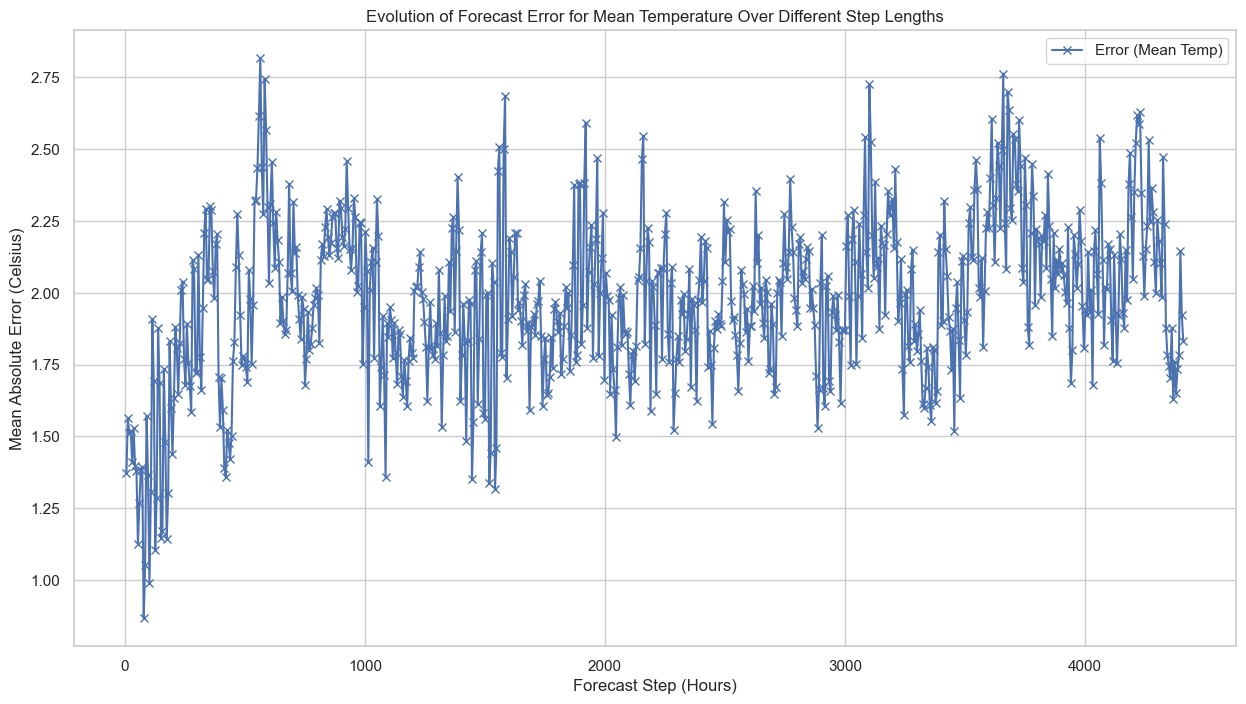

In [31]:
# Convert the 'step' column to a Pandas Timedelta object
merged_data['step'] = pd.to_timedelta(merged_data['step'])

# Group the data by the 'step' variable and calculate the mean absolute error for each group
grouped_by_step_mean = merged_data.groupby('step').agg({
    'error_mean': lambda x: abs(x).mean(),
}).reset_index()

# Convert the 'step' to hours for easier interpretation
grouped_by_step_mean['step_hours'] = grouped_by_step_mean['step'].dt.total_seconds() / 3600

# Visualize how the errors for mean temperature evolve over different step lengths
plt.figure(figsize=(15, 8))
plt.plot(grouped_by_step_mean['step_hours'], grouped_by_step_mean['error_mean'], label='Error (Mean Temp)', marker='x')

plt.xlabel('Forecast Step (Hours)')
plt.ylabel('Mean Absolute Error (Celsius)')
plt.title('Evolution of Forecast Error for Mean Temperature Over Different Step Lengths')
plt.legend()
plt.grid(True)

plt.show()

Here's the plot showing the evolution of forecast errors over different step lengths in hours. As you can see, the error tends to increase as the forecast step increases, which aligns with our initial observations:

* **Error (Mean Temp)**: Begins at around 1.4°C for 6-hour forecasts and increases to approximately 2°C for longer steps.

### Key Takeaways:
* **Increasing Error with Step Length**: The error in temperature forecasts grows as the step length increases. This is important to consider when using these forecasts as features in machine learning models for power consumption.

## Statistical Analysis of the Errors

### Distribution of Errors

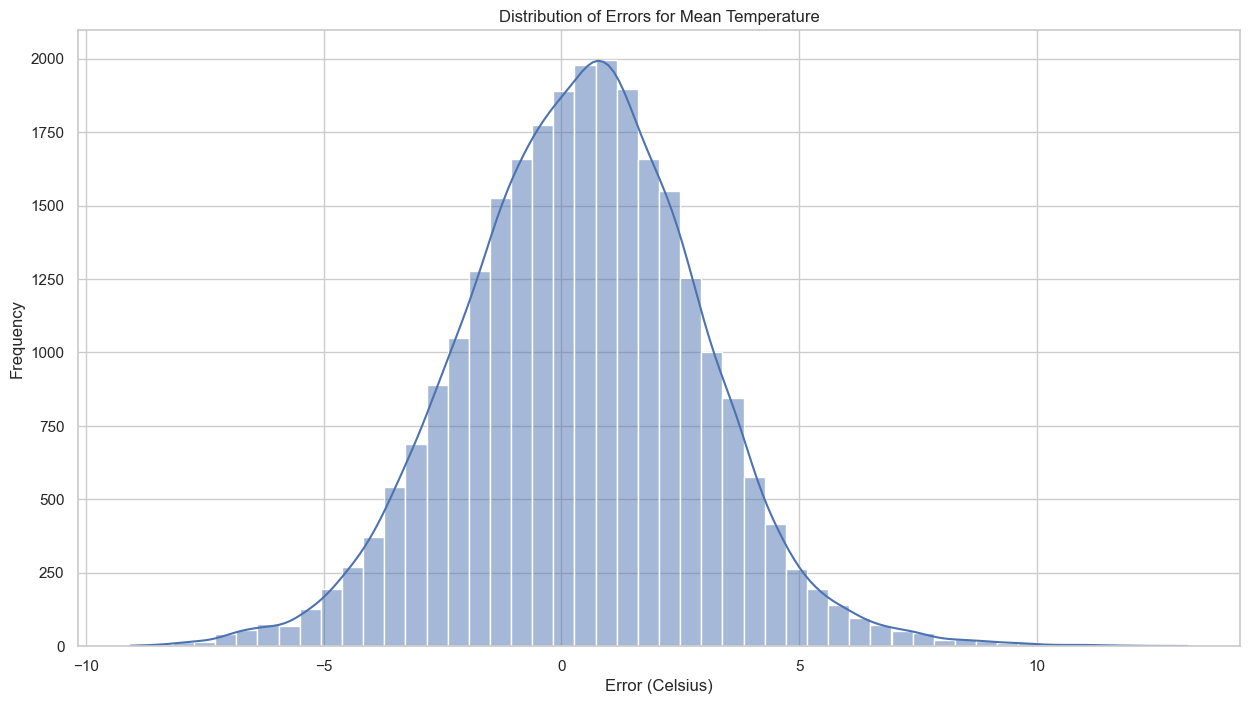

In [29]:
# Plot the distribution of errors for mean temperature
plt.figure(figsize=(15, 8))
sns.histplot(merged_data['error_mean'], kde=True, bins=50)
plt.title('Distribution of Errors for Mean Temperature')
plt.xlabel('Error (Celsius)')
plt.ylabel('Frequency')
plt.show()

**Distribution of Errors**: The histogram suggests that the errors for mean temperature have a somewhat Gaussian distribution, albeit with a slightly longer tail on the left side.

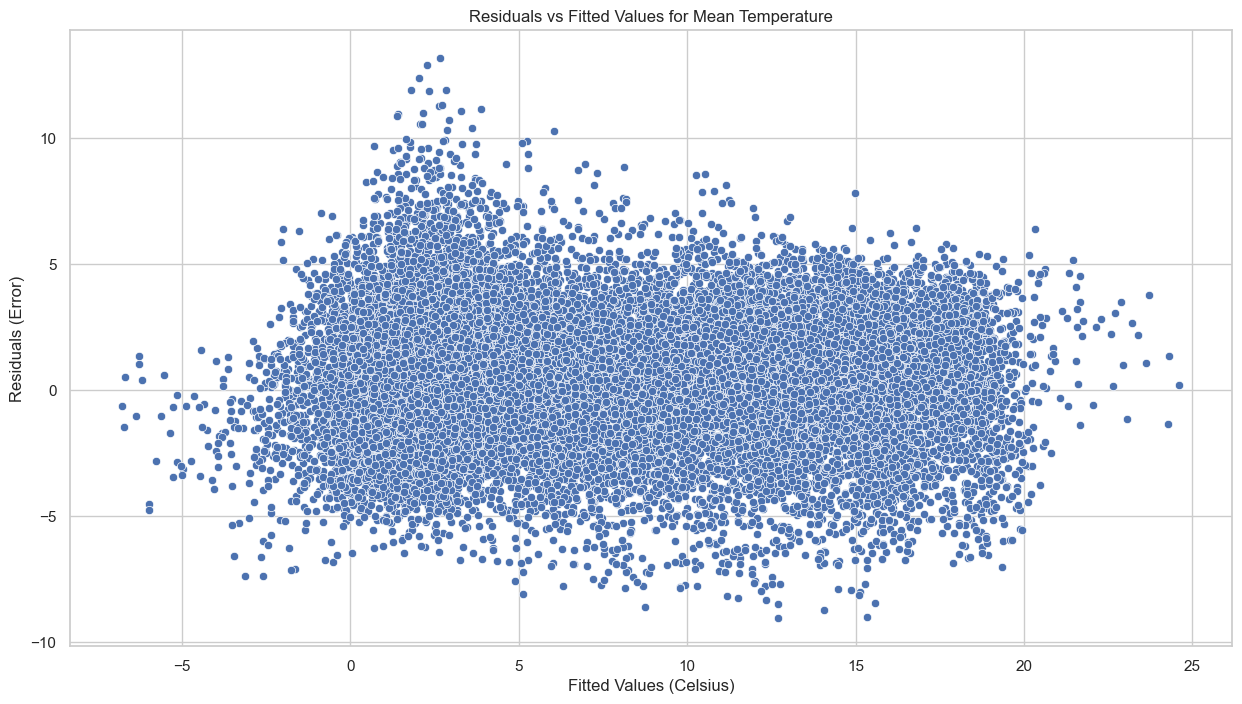

In [30]:
# Plot residuals vs fitted values to check for homoscedasticity
plt.figure(figsize=(15, 8))
sns.scatterplot(x=merged_data['t2m'], y=merged_data['error_mean'])
plt.title('Residuals vs Fitted Values for Mean Temperature')
plt.xlabel('Fitted Values (Celsius)')
plt.ylabel('Residuals (Error)')
plt.show()

**Homoscedasticity**: In the scatter plot of residuals versus fitted values, the points are spread fairly evenly across the range of fitted values, indicating that the errors might be homoscedastic (i.e., they have constant variance).